Name: Nandini Dhakad

The Spark Foundataion GRIPApril23

Data Science and Business Analytics Intern at The Spark Foundation

Task 1: Prediction using Supervised Machine Learning

Predict the percentage of an student based on the no. of study hours.

Installing libraries

In [7]:
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 7.6/7.6 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 3.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 1.0/1.0 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 42.2/42.2 MB 708.5 kB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing Libraries 

In [10]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.linear_model import LinearRegression

print("libraries imported")

libraries imported


Reading the data from given url

In [12]:
s_data=pd.read_csv("http://bit.ly/w-data")
print("data imported")

data imported


Showing the given data

In [13]:
print(s_data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [15]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Analyzing the data using scatter plot

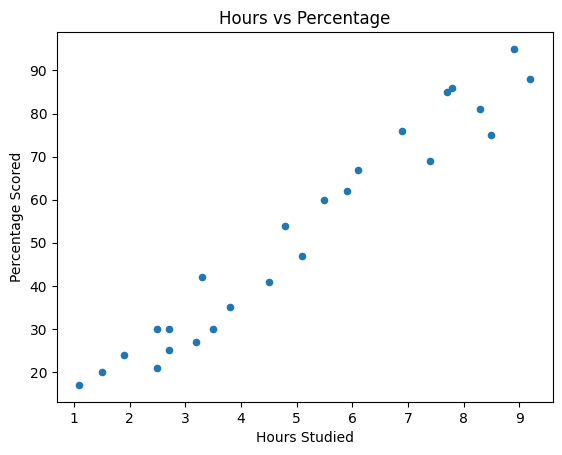

In [17]:
s_data.plot(x='Hours', y='Scores', kind='scatter')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

From the given graph we can see there is kind of linear relation between studied hours and percentage scored by student.

Data Preparation

In [18]:
x=np.asanyarray(s_data[['Hours']])
y=np.asanyarray(s_data['Scores'])


Splitting the train and test data

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Training the Model

In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("coefficient : ", regressor.coef_)
print("Intercept : ", regressor.intercept_)

print("Training complete.")

coefficient :  [9.91065648]
Intercept :  2.0181600414346974
Training complete.


Plotting the fit line on scatter plot of test data

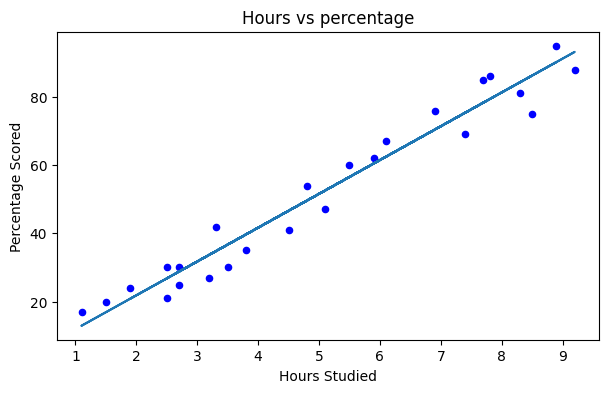

In [23]:
fitline= regressor.coef_[0]*X_train + regressor.intercept_

s_data.plot(x='Hours',y='Scores', kind='scatter', figsize=(7,4), color='b')
plt.plot(X_train,fitline)

plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

The Line we got in this graph is the best Fitline

Making Prediction to check accuracy

In [25]:
#model evaluation

from sklearn import metrics  
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test)) 
print('r2 score :', r2_score(y_test,y_pred))
r=r2_score(y_test,y_pred)

Mean Absolute Error: 4.183859899002975
r2 score : 0.9454906892105355


Mean Squared error:-It tells how close a regression is to a set of points.

r2 score: It tells how close the data are to the fittest regression line. Range is between (0,1)

In [26]:
#comparing actual and predictive value

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicting the score of a student who studied 9.25 hours

In [32]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {predicted_score}")

print("\nR2 Score is ",r)

No of Hours = 9.25
Predicted Score = [93.69173249]

R2 Score is  0.9454906892105355
